# Regresión Logística: Ejemplo y Ejercicios

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores. El resultado o 'target' es de naturaleza binaria (0/1, Verdadero/Falso, Sí/No).

En este notebook, vamos a explorar un ejemplo de cómo implementar la regresión logística en Python usando la biblioteca de aprendizaje automático `scikit-learn`. También proporcionaremos algunos ejercicios para que los estudiantes practiquen y profundicen su comprensión de la regresión logística.

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos matplotlib para que se muestre en el notebook
%matplotlib inline

## Ejemplo: Predicción de la admisión a la universidad

Para este ejemplo, vamos a utilizar un conjunto de datos que contiene información sobre los estudiantes que solicitaron la admisión a una universidad, junto con si fueron admitidos o no. Las características incluyen las calificaciones de dos exámenes y la decisión de admisión.

Nuestro objetivo es construir un modelo de regresión logística que pueda predecir si un estudiante será admitido en la universidad basándose en las calificaciones de sus exámenes.

In [2]:
# Cargamos los datos
url = 'https://stats.idre.ucla.edu/stat/data/binary.csv'
data = pd.read_csv(url)
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


El conjunto de datos contiene las siguientes columnas:

- `admit`: 1 si el estudiante fue admitido, 0 si no fue admitido
- `gre`: Puntuación del estudiante en el examen GRE (Graduate Record Exam)
- `gpa`: Promedio de calificaciones del estudiante (Grade Point Average)
- `rank`: Prestigio del instituto de pregrado del estudiante (1 es el más alto prestigio, 4 es el más bajo)

Vamos a explorar un poco los datos antes de construir el modelo.

In [3]:
# Exploramos los datos
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Ahora, vamos a visualizar los datos. Vamos a hacer un gráfico de dispersión de las calificaciones del GRE y el GPA, coloreado por la decisión de admisión. Esto nos ayudará a ver si hay una relación clara entre las características y la decisión de admisión.

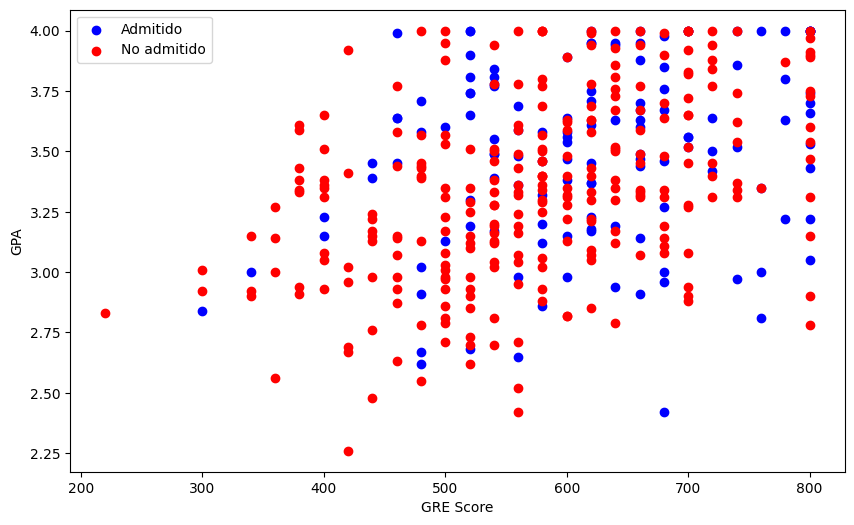

In [4]:
# Visualizamos los datos
plt.figure(figsize=(10, 6))
plt.scatter(data[data['admit']==1]['gre'], data[data['admit']==1]['gpa'], color='b', label='Admitido')
plt.scatter(data[data['admit']==0]['gre'], data[data['admit']==0]['gpa'], color='r', label='No admitido')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()

In [5]:
# Dividimos los datos en conjunto de entrenamiento y de prueba
X = data[['gre', 'gpa', 'rank']]
y = data['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Instanciamos el modelo
logreg = LogisticRegression()

# Entrenamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Hacemos predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Comparamos las predicciones con las verdaderas etiquetas
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

66.25

In [10]:
# Dividimos los datos en conjunto de entrenamiento y de prueba
X = data[['gre', 'gpa']]
y = data['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Instanciamos el modelo
logreg = LogisticRegression()

# Entrenamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Hacemos predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Comparamos las predicciones con las verdaderas etiquetas
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

68.75

In [13]:
metrics.roc_curve(y_test, y_pred)

(array([0.        , 0.01886792, 1.        ]),
 array([0.        , 0.11111111, 1.        ]),
 array([inf,  1.,  0.]))

## Ejercicios

1. **Interpretación del modelo**: Los coeficientes de un modelo de regresión logística pueden ser interpretados en términos de las probabilidades de los eventos que estamos modelando. Investiga cómo interpretar los coeficientes de un modelo de regresión logística y explica lo que los coeficientes de este modelo nos dicen sobre la relación entre las calificaciones de los exámenes y la admisión a la universidad.

2. **Mejora del modelo**: ¿Cómo podrías mejorar el rendimiento de este modelo? Proporciona al menos tres estrategias que podrías utilizar para obtener un modelo más preciso.

3. **Evaluación del modelo**: Además de la precisión, hay otras métricas que podemos utilizar para evaluar el rendimiento de un modelo de clasificación. Investiga y explica al menos dos otras métricas que podríamos utilizar para evaluar nuestro modelo de regresión logística. ¿Cómo se calculan estas métricas y qué nos dicen sobre el rendimiento del modelo?

4. **Aplicación del modelo**: Imagina que eres un administrador de admisiones en una universidad y estás utilizando este modelo para ayudarte a tomar decisiones de admisión. ¿Cómo podrías utilizar las probabilidades predichas por el modelo en tu proceso de toma de decisiones? ¿Qué otras factores podrías querer considerar además de las probabilidades predichas por el modelo?